In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime

%config InlineBackend.figure_format = 'png'
%matplotlib inline
sns.set(color_codes=True)
plt.style.use('seaborn-colorblind')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.precision', 2)

In [3]:
with open('sample_df.pickle', 'rb') as read_file:
    sample_df = pickle.load(read_file)

In [4]:
sample_df.shape

(100000, 42)

In [5]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   year                           100000 non-null  int64  
 1   month                          100000 non-null  int64  
 2   day                            100000 non-null  int64  
 3   day_of_week                    100000 non-null  int64  
 4   airline                        100000 non-null  object 
 5   flight_number                  100000 non-null  int64  
 6   tail_number                    99757 non-null   object 
 7   origin_airport                 100000 non-null  object 
 8   destination_airport            100000 non-null  object 
 9   scheduled_departure            100000 non-null  object 
 10  departure_time                 98518 non-null   object 
 11  departure_delay                98518 non-null   object 
 12  taxi_out                       

In [6]:
sample_df.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft,weather_delay,airline_name,origin_airport_name,origin_airport_city,origin_airport_state,origin_airport_latitude,origin_airport_longitude,destination_airport_name,destination_airport_city,destination_airport_state,destination_airport_latitude,destination_airport_longitude
0,2015,2,13,5,EV,4210,N26141,IAH,BNA,1904,1900,-4,18,1918,107,113,89,657,2047,6,2051,2053,2,0,0,None,None,None,None,None,None,Atlantic Southeast Airlines,George Bush Intercontinental Airport,Houston,TX,29.98,-95.34,Nashville International Airport,Nashville,TN,36.12,-86.68
1,2015,6,21,7,WN,511,N7714B,DEN,CMH,1835,1831,-4,11,1842,165,157,140,1154,2302,6,2320,2308,-12,0,0,None,None,None,None,None,None,Southwest Airlines Co.,Denver International Airport,Denver,CO,39.86,-104.67,Port Columbus International Airport,Columbus,OH,40.00,-82.89
2,2015,2,18,3,AA,1271,N3ESAA,SNA,DFW,1217,1210,-7,12,1222,168,168,139,1205,1641,17,1705,1658,-7,0,0,None,None,None,None,None,None,American Airlines Inc.,John Wayne Airport (Orange County Airport),Santa Ana,CA,33.68,-117.87,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,32.90,-97.04
3,2015,8,26,3,DL,1925,N963DN,ATL,BWI,0730,0729,-1,16,0745,110,104,81,577,0906,7,0920,0913,-7,0,0,None,None,None,None,None,None,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64,-84.43,Baltimore-Washington International Airport,Baltimore,MD,39.18,-76.67
4,2015,6,1,1,WN,3301,N793SA,SAT,DAL,1250,1244,-6,11,1255,60,64,48,248,1343,5,1350,1348,-2,0,0,None,None,None,None,None,None,Southwest Airlines Co.,San Antonio International Airport,San Antonio,TX,29.53,-98.47,Dallas Love Field,Dallas,TX,32.85,-96.85


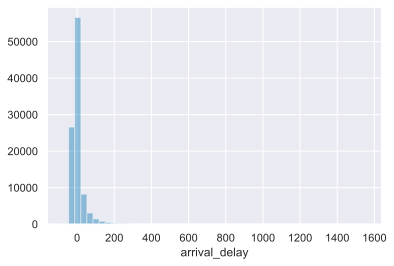

In [8]:
sns.distplot(sample_df['arrival_delay'], kde=False);

In [14]:
# Step 1
sample_df = sample_df.apply(pd.to_numeric, errors='ignore')

In [16]:
sample_df.describe()

,year,month,day,day_of_week,flight_number,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,air_system_delay,security_delay,airline_delay,late_aircraft,weather_delay,origin_airport_latitude,origin_airport_longitude,destination_airport_latitude,destination_airport_longitude
count,100000.0,100000.00,100000.00,100000.00,100000.00,100000.00,98518.00,98518.00,98468.00,98468.00,100000.00,98166.00,98166.00,100000.0,98403.00,98403.00,100000.00,98403.00,98166.00,1.00e+05,100000.00,18293.00,18293.00,18293.00,18293.00,18293.00,91592.00,91592.00,91591.00,91591.00
mean,2015.0,6.54,15.72,3.92,2172.38,1325.53,1331.88,9.51,16.10,1353.83,142.13,137.43,113.91,825.7,1470.57,7.44,1492.59,1475.67,4.55,2.85e-03,0.02,13.76,0.10,19.38,23.86,2.90,36.63,-95.49,36.66,-95.46
std,0.0,3.40,8.79,1.99,1759.44,483.61,496.23,38.33,9.01,497.75,75.21,74.12,72.15,607.4,522.25,5.67,507.13,526.39,40.58,5.33e-02,0.12,27.93,2.57,51.37,43.86,21.02,6.00,18.10,5.98,18.10
min,2015.0,1.00,1.00,1.00,1.00,3.00,1.00,-35.00,1.00,1.00,20.00,18.00,9.00,31.0,1.00,1.00,1.00,1.00,-78.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,13.48,-176.65,13.48,-176.65
25%,2015.0,4.00,8.00,2.00,733.00,915.00,919.00,-5.00,11.00,934.00,86.00,82.00,61.00,373.0,1053.00,4.00,1107.00,1057.00,-13.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,32.90,-111.98,32.90,-111.98
50%,2015.0,7.00,16.00,4.00,1683.00,1320.00,1326.00,-2.00,14.00,1339.00,123.00,119.00,95.00,651.0,1506.00,6.00,1518.00,1510.00,-5.00,0.00e+00,0.00,2.00,0.00,2.00,3.00,0.00,37.36,-90.26,37.36,-90.26
75%,2015.0,9.00,23.00,6.00,3226.00,1730.00,1738.00,7.00,19.00,1752.00,174.00,169.00,144.00,1067.0,1911.00,9.00,1916.00,1916.00,8.00,0.00e+00,0.00,18.00,0.00,19.00,30.00,0.00,40.79,-81.69,40.79,-81.53
max,2015.0,12.00,31.00,7.00,7438.00,2359.00,2400.00,1576.00,154.00,2400.00,680.00,691.00,645.00,4983.0,2400.00,177.00,2359.00,2400.00,1557.00,1.00e+00,1.00,488.00,181.00,1557.00,790.00,1002.00,71.29,-64.80,71.29,-64.80


In [22]:
sample_df[sample_df['arrival_delay'] > 20].count()

year                             14822
month                            14822
day                              14822
day_of_week                      14822
airline                          14822
flight_number                    14822
tail_number                      14822
origin_airport                   14822
destination_airport              14822
scheduled_departure              14822
departure_time                   14822
departure_delay                  14822
taxi_out                         14822
wheels_off                       14822
scheduled_time                   14822
elapsed_time                     14822
air_time                         14822
distance                         14822
wheels_on                        14822
taxi_in                          14822
scheduled_arrival                14822
arrival_time                     14822
arrival_delay                    14822
diverted                         14822
cancelled                        14822
cancellation_reason      

In [25]:
sample_df[sample_df['diverted'] == 1].sample()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft,weather_delay,airline_name,origin_airport_name,origin_airport_city,origin_airport_state,origin_airport_latitude,origin_airport_longitude,destination_airport_name,destination_airport_city,destination_airport_state,destination_airport_latitude,destination_airport_longitude
88980,2015,6,9,2,DL,393,N3748Y,ORD,ATL,1349,1349.0,0.0,21.0,1410.0,130,NaN,NaN,606,2025.0,5.0,1659,2030.0,NaN,1,0,None,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,Chicago O'Hare International Airport,Chicago,IL,41.98,-87.9,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64,-84.43


In [26]:
sample_df[sample_df['cancelled'] == 1].sample()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft,weather_delay,airline_name,origin_airport_name,origin_airport_city,origin_airport_state,origin_airport_latitude,origin_airport_longitude,destination_airport_name,destination_airport_city,destination_airport_state,destination_airport_latitude,destination_airport_longitude
90810,2015,4,20,1,WN,1004,N724SW,BWI,ATL,2030,NaN,NaN,NaN,NaN,110,NaN,NaN,577,NaN,NaN,2220,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,Baltimore-Washington International Airport,Baltimore,MD,39.18,-76.67,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64,-84.43


In [24]:
sample_df.diverted.value_counts()
sample_df.cancelled.value_counts()

0    99715
1      285
Name: diverted, dtype: int64

0    98451
1     1549
Name: cancelled, dtype: int64

In [27]:
# Step 2
sample_df['is_not_on_time'] = np.where((sample_df['arrival_delay'] > 20) | (sample_df['diverted'] == 1) |
                                       (sample_df['cancelled'] == 1), 1, 0)

In [28]:
sample_df['is_not_on_time'].value_counts()

0    83344
1    16656
Name: is_not_on_time, dtype: int64

In [29]:
sample_df[sample_df['is_not_on_time'] == 1].sample(5)

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft,weather_delay,airline_name,origin_airport_name,origin_airport_city,origin_airport_state,origin_airport_latitude,origin_airport_longitude,destination_airport_name,destination_airport_city,destination_airport_state,destination_airport_latitude,destination_airport_longitude,is_not_on_time
10512,2015,5,28,4,DL,944,N985AT,ATL,DAL,2104,2309.0,125.0,12.0,2321.0,140,NaN,NaN,721,345.0,4.0,2224,349.0,NaN,1,0,None,NaN,NaN,NaN,NaN,NaN,Delta Air Lines Inc.,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,33.64,-84.43,Dallas Love Field,Dallas,TX,32.85,-96.85,1
24159,2015,2,16,1,WN,328,N792SW,LAX,MDW,940,1023.0,43.0,15.0,1038.0,230,243.0,213.0,1750,1611.0,15.0,1530,1626.0,56.0,0,0,None,13.0,0.0,22.0,21.0,0.0,Southwest Airlines Co.,Los Angeles International Airport,Los Angeles,CA,33.94,-118.41,Chicago Midway International Airport,Chicago,IL,41.79,-87.75,1
68034,2015,7,3,5,NK,191,N522NK,DTW,MSP,1510,1619.0,69.0,23.0,1642.0,101,107.0,80.0,528,1702.0,4.0,1551,1706.0,75.0,0,0,None,64.0,0.0,11.0,0.0,0.0,Spirit Air Lines,Detroit Metropolitan Airport,Detroit,MI,42.21,-83.35,Minneapolis-Saint Paul International Airport,Minneapolis,MN,44.88,-93.22,1
39250,2015,12,29,2,UA,1982,N68821,RSW,ORD,1744,2232.0,288.0,12.0,2244.0,192,152.0,137.0,1120,1.0,3.0,1956,4.0,248.0,0,0,None,0.0,0.0,1.0,247.0,0.0,United Air Lines Inc.,Southwest Florida International Airport,Ft. Myers,FL,26.54,-81.76,Chicago O'Hare International Airport,Chicago,IL,41.98,-87.90,1
23487,2015,9,17,4,AA,1439,N3GVAA,DFW,BNA,1500,1522.0,22.0,21.0,1543.0,110,114.0,86.0,631,1709.0,7.0,1650,1716.0,26.0,0,0,None,4.0,0.0,0.0,22.0,0.0,American Airlines Inc.,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,32.90,-97.04,Nashville International Airport,Nashville,TN,36.12,-86.68,1


In [44]:
def pairplot_features(df):
    """Displays pairplot for given set of features with distributions
    differentiated by the target class is_not_on_time.
    
    Args: 
        df: Dataframe with desired features and target.    
    """
    sample = df.sample(10000, random_state=4444)
    sns.pairplot(sample, hue='is_not_on_time', plot_kws=dict(alpha=0.3)) 


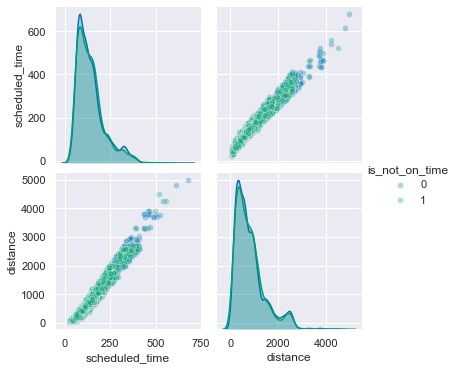

In [43]:
pairplot_features(sample_df[['scheduled_time', 'distance', 'is_not_on_time']])

In [46]:
def feature_target_selection(features, target, df):
    """Returns two dataframes, each corresponding to the features and target.

    Args:
        features: A list of features for the model.
        target: The target for the model, passed as a single-element list.

    Returns:
        X: A dataframe only consisting of the features.
        y: A dataframe only consisting ot the target.
    """
    X = df.loc[:, features]
    y = df[target]
    return X, y

In [45]:
def initial_split(X, y):
    """Splits features and target dataframes in 80/20 ratio.

    Args:
        X: A dataframe only consisting of the features.
        y: A dataframe only consisting of the target.

    Returns:
        X_train_val: A dataframe, containing 80% of the original features data,
            to be used for training and validation.
        X_test: A dataframe, containing 20% of the original features data, to be
            used for testing.
        y_train_val: A dataframe, containing 80% of the original target data, to
            be used for training and validation.
        y_test: A dataframe, containing 20% of the original target data, to be
            used for testing.
    """
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=0.2, random_state=4444)
    return X_train_val, X_test, y_train_val, y_test

In [ ]:
X, y = feature_target_selection(['scheduled_time', 'distance'], ['is_not_on_time'], sample_df)

In [ ]:
X_train_val, X_test, y_train_val, y_test = initial_split(X, y)